<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/jax%E7%89%9B%E9%A0%93%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as np
from jax import grad, jit, vmap,linear_util
from jax import random
from jax import jacfwd, jacrev
from jax.numpy import linalg
import matplotlib.pyplot as plt
from numpy import nanargmin,nanargmax 

# loss function

In [2]:
def L(x): 
  return x**2 + 2*x -1

# Newton method

In [3]:
gradL = grad(L)
gradL2 = grad(gradL)

def minNewton(x) : 
  return x - gradL(x)/gradL2(x)
def minGD(x,lr):
  return x - lr*gradL(x)

# run 

/usr/local/lib/python3.6/dist-packages/jax/lib/xla_bridge.py:127: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


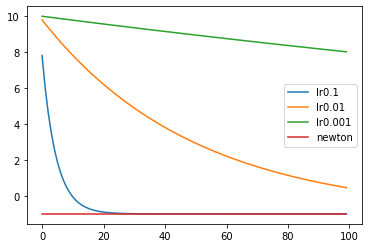

In [4]:
# 記錄用
history = {}
history['lr0.1'] = []
history['lr0.01'] = []
history['lr0.001'] = []
history['newton'] = []

# 梯度下降法
for lr in [0.1,0.01,0.001]:
  x = 10.0
  for epoch in range (100) :
    x = minGD(x,lr)
    history["lr{}".format(lr)].append(x)

# 牛頓法
x = 10.0
for epoch in range(100):
  x = minNewton(x)
  history['newton'].append(x)

# 比較結果
for i in history.keys():
  plt.plot(history[i],label=i)
plt.legend()
plt.show()